## Assignment template 2) Assessing cyclical dependency of fox and rabbit populations

This assignment follows on from 'Practical 5. Modules and Functions - Solving differential equations'. The main objective is:

<div class="alert alert-block alert-success">
<b> Plot the change in numbers of foxes as a function of rabbits for 6 different initial populations </b> 
  
Overview: You are tasked with:

 - 1. Looping through multiple starting numbers of foxes and rabbits.
 - 2. Plotting the number of foxes as a function of rabbits for these multiple conditions

Based on the example given in class, we can break this exercise down into a number of steps:

 - Defining the starting conditions we will cycle through
 - Initialise a matrix for foxe and rabbit numbers that will store the results of each simulation
 - Assign the result from each simulation as a specific variable. For example, this might be: rabbits1, foxes1, rabbits2, foxes2 etc.
 - Create a 2D plot of fox numbers as a function of rabbit
 
<div class="alert alert-block alert-warning">
<b>Please note:</b> 
    
As you are generating multiple outputs that represent the changing number of foxes and rabbits, you will need to plot each pair on the same graph. You can do this in Matplotlib by chaining together 'plot'commands. For example:

```python
plt.plot(rabbits, foxes, 'r-', label='0')
plt.plot(rabbits1, foxes1, 'b-', label='1')
plt.plot(rabbits2, foxes2, 'g-', label='2')
```
You can use the rest of the plotting commands from the class example. Aside from a working notebook we are also looking for the following:

 - An associated narrative with each operation. This includes the following sections:
 > Introduction and methdology
  - What is the challenge and how are you presenting it?
  - What modules/functions are you using?
 > Results
  - What is happening in each figure?
 > Referencing
  - What is the original source of the theory and/or data?
 - Comments in the code boxes using the # symbol
  - Remember that someone might not know what each line of code does.

You may also want to consider a broader discussion around this challenge. For example: 
 - What could be improved? 
 - How do you know your results are correct? [i.e. what might improve trust in your simulations?]
 - What if someone wanted to get in touch with you and re-use this code? Any restrictions on data?

To start, we reccomend you first get the code implementation working and then construct the narrative around it. Also please note that to add another code or markdown box, you can simple use the 'Insert' option on the main menu.

As a guide, your final figure plotting rabbits versus foxes should resemble the following:

<tr>
    <td> <img src="images/Assessment2_output.png" alt="Drawing" style="width: 400px;"/> </td>
</tr>
  
</div>

</div>

 Abstract


This project aims to solve the predator-prey equation/Lotka-Volterra model, which is a single, non-linear differential equation(Frank Hoppensteadt, 2006). The challenge is to loop through 6 initial populations of rabbits and foxes and plot a figure to illustrate the results. Firstly, we need to solve the differential equation, which you can find on the first part of the methodology section of this notebook. Following that, we can work through the six initial conditions step by step, as you will see in the second part of methodology section. Thus, allowing us to analyse the figures and the validity of the model.
From my analysis, i found that the results show a cyclical behaviour between these 2 species in terms of changes in population size, as the model solely evaluates interactions between TWO species.

what you will find in this notebook(i.e.index):

- Introduction to the predator-prey model and the programming/codes i used to solve the challenge. 
- Methodology sections: 2 sections of codes with narrative comments.
- The results obtained and references. Including the plots, as well as discussions about the figures and the theory behind the model.



## Introduction


The predator-prey equation/Lotka-Volterra model is first order, simple differential equation that analyses the biological system of 2 species and their interaction in terms of predator and prey. The model was created independently by both Alfred Lotka and Vito Volterra (Forrest, no date). this model has been used mostly to analyse the dynamics of competition and is generalised to 2 species (Kinoshita, 2013).
However, the model is simplified in terms of assessing realistic biological interactions in ecosystems. Nonetheless, it is the basis of the more complex models (e.g. the predator-prey Bazykin and Berezovskaya (BB) model) and it can also be modified for more than 2 variable interaction (Forrest, no date). I will further discuss the problems with this model in the 'results' section of this notebook.


'Basic idea: Population change of one species depends on:

- Its current population.
- Its reproduction rate.
- Its interactions with other species (predation or prey).'(Forrest, no date)

The differential equation is:
- 𝑑𝑈/𝑑𝑡=𝑎𝑈−𝑏𝑈𝑉        ('dU/dt' is the change in the number of rabbits with time.) 
- 𝑑𝑉/𝑑𝑡=−𝑐𝑉+𝑑𝑏𝑈𝑉       ('dV/dt' is the change in the number of foxes with time.)

definition of the parameters:

- U = rabbit population 
- v = fox population
- a = natural growth rate of rabbits, when there are no foxes.
- b = the rate at which rabbits die due to predation by foxes.
- c = natural death rate of foxes when there are no rabbits.
- d = the measure of how many predated rabbits led to an increase in the fox population.






## Methodology

I will create two sections of codes for this notebook:

1) Solving the differential equation: the population and interactions between the predator (foxes) and prey (rabbits) as a function of time. This will include a plot of the results. 

2) Section 1 will then set the conditions to loop through 6 initial populations of rabbits and foxes. I will also create a plot of foxes as a function of rabbits.




Step-by-step approach for section 1 of the programming:

- create some initial conditions that define our starting populations of rabbits and foxes
- define the constant parameters a,c,c and d
- set up the function that defines our differential equations and is called by the internal ODE solver
- run the simulation for a period of time.
- plot the results.

We'll need to import 3 modules that will do all the calculation for us (i.e. integrate the predator-prey differential equation), as well as plotting the outcomes with 'matplotlib.pyplot' library.


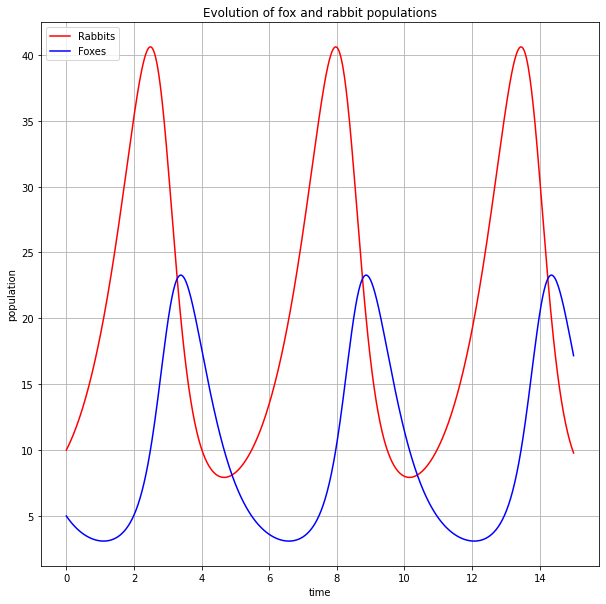

In [1]:
# firstly, we will import packages i will use/need.
# the 'import' statement allows us to import module we want.
import numpy as np # the module numply will allows us to work with numerical operations  Importing numpy as np just makes it easier to code with.
from scipy.integrate import odeint # We only want to use the 'odeint' [Solve Initial Value Problems] from the scipy.integrate package
import matplotlib.pyplot as plt # Import Matplotlib so we can plot results

#-------'INSERT CODE HERE'-------
# Definition of parameters
a = 1.  
b = 0.1
c = 1.5
d = 0.75 
U0 = 10 
V0 = 5

def differential_equations(array, t): #performing the differential equation.
    U = array [0]
    V = array [1]
    dU_dt = a*U - b*U*V
    dV_dt = -c*V + d*b*U*V
    
    
    return [dU_dt,dV_dt]
#--------------------------------


t = np.linspace(0, 15, num=1000) # time span and steps (start, end, number of entries), with 100 entries.

# Integrate the Lorenz equations 
# Solve the differential equation using the 'odeint' package
# A couple of things to note here:
# 1 - The ODE solver expects key information on starting conditions and the length [duration] of our integration
# 2 - The ODE solver returns an array which gives N as one column and time [t] as the other, so we can plot this below

#-------'INSERT CODE HERE'-------
solution = odeint(differential_equations, (U0, V0), t) #solving the differential equation. 

Rabbits = solution[:,0] 
Foxes = solution[:,1] 


#--------------------------------

# As we are now passing an array of variables, the function will return an array of each variable value at the given time stamps defined by our 't' variables
rabbits = solution[:,0] # X is the first variable in our array, thus first column in our output
foxes = solution[:,1] # Y is the second variable in our array, thus second column in our output

# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(10,10))
plt.plot(t, rabbits, 'r-', label='Rabbits') #plotting the population of rabbits as a fuction of time.
plt.plot(t, foxes  , 'b-', label='Foxes') # plotting the population of foxes as a fuction of time.
plt.grid()
plt.legend(loc='best')
plt.xlabel('time') # labeling the x axis as 'time'
plt.ylabel('population') # labelling the y axis as 'population'
plt.title('Evolution of fox and rabbit populations') # title of the plot
plt.show() # call the function

The figure above is known as a parametric plot. This shows the fluctuation of rabbit and fox populations (y-axis) as a function of time (x-axis). There is a trend on this graph that indicates the interaction between rabbits and foxes. From the figure, we see that the rabbit population peaks before the fox population because rabbits grow exponentially in the absence of foxes and due to the supply of unlimited food(grasslands). Whereas, foxes depend on rabbits for food, thus peak after. Furthermore, the rabbit population decreases exponentially during the peak period of foxes as they are the prey, which also means that the fox population exponentially decreases shortly afterwards. This repeating pattern is projected on the second plot (phase plot) at the end of the notebook.

Step-by-step approach for section 2:

- Defining the starting conditions to will cycle through.
- Initialise a matrix for fox and rabbit numbers that will store the results of each simulation.
- Assign the result from each simulation as a specific variable.
- Create a 2D plot of fox numbers as a function of rabbit

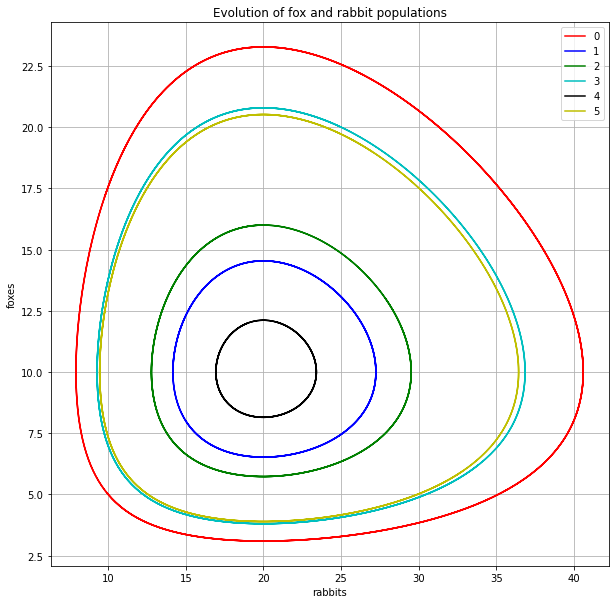

In [2]:
#in this section we will loop througth 6 intial population: starting numbers of rabbits and foxes.

# looping through the first [0] intial population: numbers of foxes and rabbits.
U0 = 10  #  10 rabbits
V0 = 5  # 5 foxes
solution = odeint(differential_equations, (U0, V0), t) #solving the differential equation. 
rabbits = solution[:,0] # X is the first variable in our array, thus first column in our output
foxes = solution[:,1]  # Y is the second variable in our array, thus second column in our output


# intial condition [1].
U1 = 15   # 15 rabbits
V1 = 8   # 8 foxes
solution = odeint(differential_equations, (U1, V1), t) #solving the differential equation. 
rabbits1 = solution[:,0] # X is the first variable in our array, thus first column in our output
foxes1 = solution[:,1] # Y is the second variable in our array, thus second column in our output


# intial condition [2]. 
U2 = 20  # 20 rabbits 
V2 = 16 # 16 foxes
solution = odeint(differential_equations, (U2, V2), t) #solving the differential equation. 
rabbits2 = solution[:,0]  # X is the first variable in our array, thus first column in our output
foxes2 = solution[:,1] # Y is the second variable in our array, thus second column in our output


#intial condition [3]. 
U3 = 25  #  25 rabbits
V3 = 20 # 20 foxes
solution = odeint(differential_equations, (U3, V3), t) #solving the differential equation. 
rabbits3 = solution[:,0] # X is the first variable in our array, thus first column in our output
foxes3 = solution[:,1] # Y is the second variable in our array, thus second column in our output


# intial condition [4].
U4 = 19  # 19 rabbits
V4 = 12 # 12 foxes
solution = odeint(differential_equations, (U4, V4), t) #solving the differential equation. 
rabbits4 = solution[:,0] # X is the first variable in our array, thus first column in our output
foxes4 = solution[:,1] # Y is the second variable in our array, thus second column in our output


# intial condition [5].
U5 = 27  # 27 rabbits
V5 = 19 # 19 foxes
solution = odeint(differential_equations, (U5, V5), t) #solving the differential equation. 
rabbits5 = solution[:,0] # X is the first variable in our array, thus first column in our output
foxes5 = solution[:,1] # Y is the second variable in our array, thus second column in our output


#plotting a 2D figure to illustrate the results.
fig = plt.figure(figsize=(10,10))
plt.plot(rabbits, foxes, 'r-', label='0') # as we are plotting foxes as a fuction of rabbits, we will plot each pair of initial condition on the same graph.
plt.plot(rabbits1, foxes1, 'b-', label='1') #module 'plt' allows us to chain 'rabbits' and 'foxes' together.
plt.plot(rabbits2, foxes2, 'g-', label='2')
plt.plot(rabbits3, foxes3, 'c-', label='3')
plt.plot(rabbits4, foxes4, 'k-', label='4')
plt.plot(rabbits5, foxes5, 'y-', label='5')
plt.grid()
plt.legend(loc='best')
plt.xlabel('rabbits') # title of the x axis 
plt.ylabel('foxes') # title of the y axis 
plt.title('Evolution of fox and rabbit populations') #title of the plot 
plt.show() # this will display the plot below.

## Results


#### references

The plot above is known as the 'phase plot'.
The figure describes the cyclical interactions of rabbits and foxes. It is the number of foxes as a function of rabbits. This projects that when the population of rabbits increases, foxes productivity will start to increase as they have more rabbits (prey) to eat. Thus, leading to the decline of the rabbit population, which intern declines the fox population. This is the cyclical nature that the plot above- "evolution of fox and rabbit populations" shows.

As you can see, there are 6 oscillation, representing the 6 initial populations of rabbits and foxes. These cycles are called 'limit cycles' as '...the amplitude and period of oscillation depend on the initial states' (Demirel, 2002). 
The various initail populations allow us to see the patterns and behaviours (to a limited extent) of these two species and the effect over time.

Image the 'Time' on this plot is going anti-clockwise around the cycle.
For example:
For the initial condition for cycle 0 (red), we start with 10 rabbits and 5 foxes. Going anti-clockwise from the starting point, you can see that the number of rabbits increases, while the number of foxes stays relatively the same. When the rabbit population peaks at 41, the fox population rapidly increase until they peak at 23 foxes. This intern decreases the rabbit population. Finally, the fox population will dramatically decline back to 5 due to the depletion of food supply. The cycle continuously repeats and is infinite. 


This model is quite simplified as it isolates the interactions and effects only between these two species. i.e. its closed system. For example, foxes have other food sources, so they are not directly/only affected by the decline of rabbits. (Forrest, no date).

problems with the predator-prey equation/Lotka-Volterra model from (He, no date):


- the initial conditions determine the dimension of the cycles. 
- assumption that rabbit(prey) population can grow exponentially without predator. 
- assumes that an individual predator can eat an unlimited number/amount of rabbits 
- the Lotka-Volterra model is not the best model to simulate any analysis, but it does form the fundamental basis from which other models were able to develop. e.g. The Rosenzweig and MacArthur (RM) model (He, no date); Kermack-McKendrick model(Frank Hoppensteadt, 2006); Maleyʼs models of Barrettʼs Esophagus, CancerSim; and agent-based model-echo (forrest, no date).

References:

- Demirel, Y.(2002). Nonequilibrium Thermodynamics.  Blacksburg, VA, U.S.A. Pages 59-83. 
- Frank Hoppensteadt.(2006). 'Predator-prey model'. Scholarpedia, 1(10):1563.
- Forrest, S. (no date). Predator-Prey Models. The University of New Mexico.[online]. [02/05/21]. URL:https://www.cs.unm.edu/~forrest/classes/cs365/lectures/Lotka-Volterra.pdf
- He, S. (no date). Modelling Predator-Prey Interactions with ODE. university of birnigham. URL:https://www.cs.bham.ac.uk/~szh/teaching/matlabmodeling/Lecture6_body.pdf
- Kinoshita, S. (2013). ‘Introduction to Nonequilibrium Phenomena.’ Pattern Formations and Oscillatory Phenomena, Jan 1 (pp. 1-59).


Licence:

This whole notebook, including the codes and the written content is licensed under the MIT license. 
